In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


Trends: 

1. For Capomulin, with a correlation of 0.84, there is a positive correlation between the mouse’ average tumor volume and its weight. 

2. Capomulin and Ramicane: they have the most data points out of all the drugs present in the study. Their median and median tumor volume are the lowest among drugs tested. So they are the most successful drugs in reducing the tumor volume within the mice subjects. Next step is to focus on comparing these two drugs with more comprehensive datasets.  

3. For one mouse, its tumor volume is not necessarily declining with timepoint increases though its long term trend is decreasing. Testers should be more patient during testing and provide more timepoint data points. 

    
    

# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset, inner join
# Display the data table for preview
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_study.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
mouse_study["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_groupby_mouseid_timepoint = mouse_study.groupby(["Mouse ID", "Timepoint"])
mouse_study_groupby_mouseid_timepoint.count().head()

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
a203     0                     1    1           1           1   
         5                     1    1           1           1   
         10                    1    1           1           1   
         15                    1    1           1           1   
         20                    1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
a203     0                           1                 1  
         5                           1                 1  
         10                          1                 1  
         15                          1                 1  
         20                          1                 1

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
pd.set_option('display.max_rows', None)
mouse_study_groupby_mouseid_timepoint["Drug Regimen"].value_counts() # It shows g989 has duplicate time points 
mouse_study.loc[mouse_study["Mouse ID"] == "g989", :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_cleaned = mouse_study.loc[mouse_study["Mouse ID"] != "g989", :]
mouse_study_cleaned.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_study_cleaned["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# groupby Drug Regimen
mouse_study_cleaned_groubydrugregimen = mouse_study_cleaned.groupby(["Drug Regimen"])
mouse_study_cleaned_groubydrugregimen.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [9]:
# Calculate mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = mouse_study_cleaned_groubydrugregimen["Tumor Volume (mm3)"].mean()
median = mouse_study_cleaned_groubydrugregimen["Tumor Volume (mm3)"].median()
variance = mouse_study_cleaned_groubydrugregimen["Tumor Volume (mm3)"].var()
stdv = mouse_study_cleaned_groubydrugregimen["Tumor Volume (mm3)"].std()
sem = mouse_study_cleaned_groubydrugregimen["Tumor Volume (mm3)"].sem()

drugregimen_summary_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, "Tumor Volume Std. Dev.": stdv, "Tumor Volume Std. Err.": sem})
drugregimen_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

mouse_study_cleaned_groubydrugregimen.count()
drugregimen_summary_agg = mouse_study_cleaned_groubydrugregimen.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
drugregimen_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

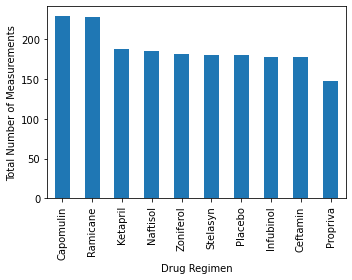

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

mouse_study_cleaned_groubydrugregimen["Mouse ID"].count()
mouse_study_cleaned_groubydrugregimen["Mouse ID"].count().sort_values()
mouse_study_cleaned_groubydrugregimen["Mouse ID"].count().sort_values(ascending = False).plot(kind="bar", figsize=(5,4))
plt.ylabel("Total Number of Measurements")
plt.tight_layout()


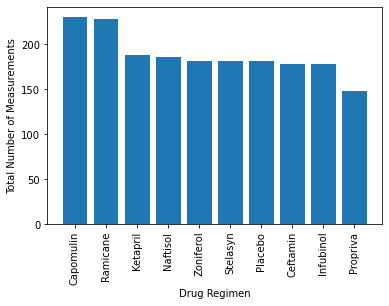

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.

count = mouse_study_cleaned["Drug Regimen"].value_counts()
count.values

plt.bar(count.index.values, count.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
# plt.tight_layout()
plt.show()

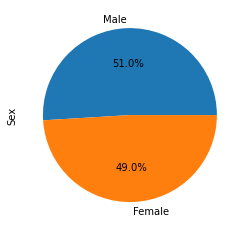

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_study_cleaned["Sex"].value_counts()
mouse_study_cleaned["Sex"].value_counts().plot(kind="pie", autopct="%.1f%%", figsize=(5,4))
plt.show()

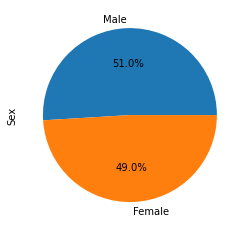

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_study_cleaned_sex_df = pd.DataFrame(mouse_study_cleaned["Sex"].value_counts())
mouse_study_cleaned_sex_df = mouse_study_cleaned_sex_df.rename(columns={"Sex": "Total Measurements per Sex"})
mouse_study_cleaned_sex_df = mouse_study_cleaned_sex_df.reset_index()
mouse_study_cleaned_sex_df = mouse_study_cleaned_sex_df.rename(columns={"index": "Sex"})
mouse_study_cleaned_sex_df

labels = mouse_study_cleaned_sex_df["Sex"]
sizes = mouse_study_cleaned_sex_df["Total Measurements per Sex"]
plt.pie(sizes, labels=labels, autopct="%.1f%%", startangle=0)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_study_cleaned.head(10)
mouse_study_cleaned_4 = mouse_study_cleaned.loc[(mouse_study_cleaned["Drug Regimen"] == "Capomulin") | (mouse_study_cleaned["Drug Regimen"] == "Ramicane") | (mouse_study_cleaned["Drug Regimen"] == "Infubinol") | (mouse_study_cleaned["Drug Regimen"] == "Ceftamin"), :]
mouse_study_cleaned_4

# Start by getting the last (greatest) timepoint for each mouse
capturelasttimepoint = mouse_study_cleaned_4.groupby(["Mouse ID"]).max()['Timepoint']
capturelasttimepoint_df = pd.DataFrame(capturelasttimepoint)
capturelasttimepoint_df # Mouse ID is the index of the DataFrame

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capturelasttimepoint_merge = pd.merge(capturelasttimepoint_df, mouse_study_cleaned, on=("Mouse ID","Timepoint"), how="left")
capturelasttimepoint_merge = capturelasttimepoint_merge.sort_values(by=['Drug Regimen'])
capturelasttimepoint_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
49,l897,45,Capomulin,Male,17,19,38.846876,1
34,j119,45,Capomulin,Female,7,23,38.125164,1
35,j246,35,Capomulin,Female,21,21,38.753265,1
78,u364,45,Capomulin,Male,18,17,31.023923,3
26,g316,45,Capomulin,Female,22,22,40.159220,2


In [16]:
# Use function to calculate the IQR and quantitatively determine if there are any potential outliers. 

def chart(drug):
    tumorvolume = capturelasttimepoint_merge.loc[capturelasttimepoint_merge["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    quartiles = tumorvolume.quantile([.25,.5,.75])
    quartiles
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq   
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"We are checking on {drug}:")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

# Put treatments into a list for for loop (and later for plot labels)

druglist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
for drug in druglist:
    chart(drug)  
 

We are checking on Capomulin:
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
We are checking on Ramicane:
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
We are checking on Infubinol:
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
We are checking on Ceftamin:
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [17]:
# # I am using Infubinol to test out my thought process, you can ignore this cell. But I am leaving it here in case I need to check it out years later. 

# tumorvolume_Infubinol = capturelasttimepoint_merge.loc[capturelasttimepoint_merge["Drug Regimen"] == "Infubinol", 'Tumor Volume (mm3)']
# tumorvolume_Infubinol
# quartiles_Infubinol = tumorvolume_Infubinol.quantile([.25,.5,.75])
# quartiles_Infubinol
# quartiles_Infubinol_median = quartiles_Infubinol.median()
# lowerq_Infubinol = quartiles_Infubinol[0.25]
# upperq_Infubinol = quartiles_Infubinol[0.75]
# iqr_Infubinol = upperq_Infubinol-lowerq_Infubinol  # about 11 
# lower_bound_Infubinol = lowerq_Infubinol - (1.5*iqr_Infubinol)
# upper_bound_Infubinol = upperq_Infubinol + (1.5*iqr_Infubinol)
# # print(f"we are checking on {drug}:")
# print(f"quartiles_Infubinol_median {quartiles_Infubinol_median}")
# print(f"lowerq_Infubinol {lowerq_Infubinol}")
# print(f"upperq_Infubinol {upperq_Infubinol}")


# print(f"Values below {lower_bound_Infubinol} could be outliers.")
# print(f"Values above {upper_bound_Infubinol} could be outliers.")
# plt.boxplot(tumorvolume_Infubinol)

In [18]:
# # I am using Infubinol to test out my thought process, you can ignore this cell. But I am leaving it here in case I need to check it out years later. 

# tumorvolume_Infubinol.sort_values()

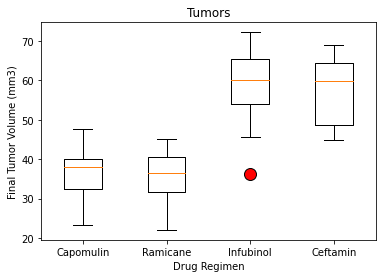

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

cap_df = capturelasttimepoint_merge.loc[capturelasttimepoint_merge["Drug Regimen"] == "Capomulin", :]["Tumor Volume (mm3)"]
ram_df = capturelasttimepoint_merge.loc[capturelasttimepoint_merge["Drug Regimen"] == "Ramicane", :]["Tumor Volume (mm3)"]
inf_df = capturelasttimepoint_merge.loc[capturelasttimepoint_merge["Drug Regimen"] == "Infubinol", :]["Tumor Volume (mm3)"]
ceft_df = capturelasttimepoint_merge.loc[capturelasttimepoint_merge["Drug Regimen"] == "Ceftamin", :]["Tumor Volume (mm3)"]

data_to_plot = [cap_df, ram_df, inf_df, ceft_df]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
outlier_style = dict(markerfacecolor='red', markersize=12)
ax1.boxplot(data_to_plot, labels=druglist, flierprops=outlier_style)

plt.savefig('boxplot')
plt.show()


## Line and Scatter Plots

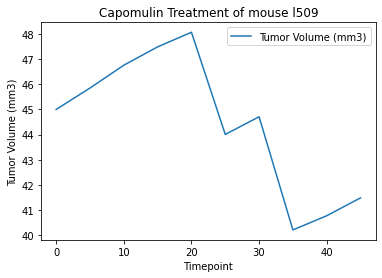

<Figure size 432x288 with 0 Axes>

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Use loc condition to extract information of a specific mouseid

onemouseid = "l509"

onemouseid_df = mouse_study_cleaned.loc[mouse_study_cleaned["Mouse ID"] == onemouseid]
onemouseid_df = onemouseid_df.drop(columns=["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Metastatic Sites"])
onemouseid_df = onemouseid_df.set_index("Timepoint")
onemouseid_df
onemouseid_df.plot(kind="line")
plt.title(f"Capomulin Treatment of mouse {onemouseid}")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
plt.tight_layout()



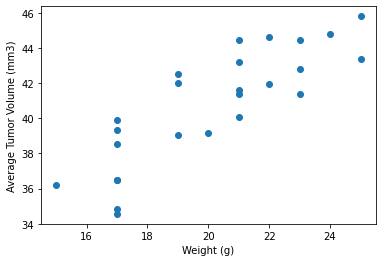

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mouse_study_cleaned_DrugRegimen_groupbyweight = mouse_study_cleaned.loc[mouse_study_cleaned["Drug Regimen"] == "Capomulin"].groupby(["Weight (g)", "Mouse ID"])
mouse_study_cleaned_DrugRegimen_groupbyweight.count()
mouse_study_cleaned_DrugRegimen_groupbyweight_tumorvolumemean = mouse_study_cleaned_DrugRegimen_groupbyweight["Tumor Volume (mm3)"].mean()
mouse_study_cleaned_DrugRegimen_groupbyweight_tumorvolumemean

mouse_study_cleaned_DrugRegimen_groupbyweight_tumorvolumemean_df = pd.DataFrame(mouse_study_cleaned_DrugRegimen_groupbyweight_tumorvolumemean)
mouse_study_cleaned_DrugRegimen_groupbyweight_tumorvolumemean_df = mouse_study_cleaned_DrugRegimen_groupbyweight_tumorvolumemean_df.reset_index()
plt.scatter(mouse_study_cleaned_DrugRegimen_groupbyweight_tumorvolumemean_df['Weight (g)'], mouse_study_cleaned_DrugRegimen_groupbyweight_tumorvolumemean_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(mouse_study_cleaned_DrugRegimen_groupbyweight_tumorvolumemean_df['Weight (g)'], mouse_study_cleaned_DrugRegimen_groupbyweight_tumorvolumemean_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [23]:
model=st.linregress(mouse_study_cleaned_DrugRegimen_groupbyweight_tumorvolumemean_df['Weight (g)'], mouse_study_cleaned_DrugRegimen_groupbyweight_tumorvolumemean_df['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241044, intercept=21.55216053268502, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.12754359033201337)

In [24]:
mslope = 0.9544396890241044
bintercept = 21.55216053268502

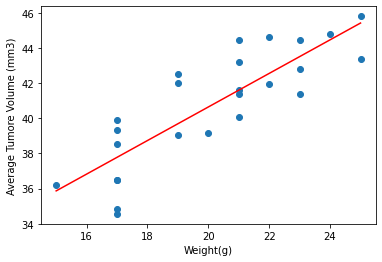

In [25]:
y_values = mouse_study_cleaned_DrugRegimen_groupbyweight_tumorvolumemean_df['Weight (g)']*mslope+bintercept
plt.scatter(mouse_study_cleaned_DrugRegimen_groupbyweight_tumorvolumemean_df['Weight (g)'], mouse_study_cleaned_DrugRegimen_groupbyweight_tumorvolumemean_df['Tumor Volume (mm3)'])
plt.plot(mouse_study_cleaned_DrugRegimen_groupbyweight_tumorvolumemean_df['Weight (g)'], y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.show()